### Features Selection-Various Techniques

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
importa matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("mobile_dataset.csv")

In [7]:
df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1


In [39]:
df=df.drop("Unnamed: 0",axis=1)

Feature selection offers a simple yet effective way to overcome this challenge by eliminating redundant and irrelevant data. Removing the irrelevant data improves learning accuracy, reduces the computation time, and facilitates an enhanced understanding for the learning model or data.

## univariate Selection

In [40]:
x=df.iloc[:,:-1]
y=df["price_range"]

In [41]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [42]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [43]:
from sklearn.feature_selection import SelectKBest,chi2


In [44]:
# apply slect k best algo

In [45]:
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_rank_features.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x0000019512C41700>)

In [46]:
ordered_rank_features

SelectKBest(score_func=<function chi2 at 0x0000019512C41700>)

In [47]:
ordered_rank_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [48]:
pd.DataFrame(ordered_rank_features.scores_,columns=["Scores"])


,Scores
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [49]:
df_scores=pd.DataFrame(ordered_rank_features.scores_,columns=["Scores"])
dfcolumns=pd.DataFrame(x.columns)

In [50]:
features_rank=pd.concat([dfcolumns,df_scores],axis=1)

In [51]:
features_rank.columns=["features","score"]

In [52]:
features_rank

,features,score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [53]:
#  This score is very much important it says how good or important this feature is this
# higher the value of this score higher the value of this particular feature is

In [55]:
features_rank.nlargest(10,"score") # this my top 10 features according to univariate selection

,features,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [60]:
print(model.feature_importances_)

[0.06011774 0.02008483 0.03331981 0.02016313 0.03359531 0.01649999
 0.03500379 0.03392356 0.03714467 0.033482   0.03462287 0.04663753
 0.04898227 0.39112042 0.03385562 0.03381481 0.03466511 0.0144071
 0.01879466 0.01976477]


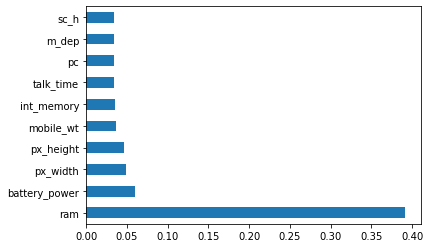

In [67]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

### pearson correlation

In [70]:
corr=df.corr()

<AxesSubplot:>

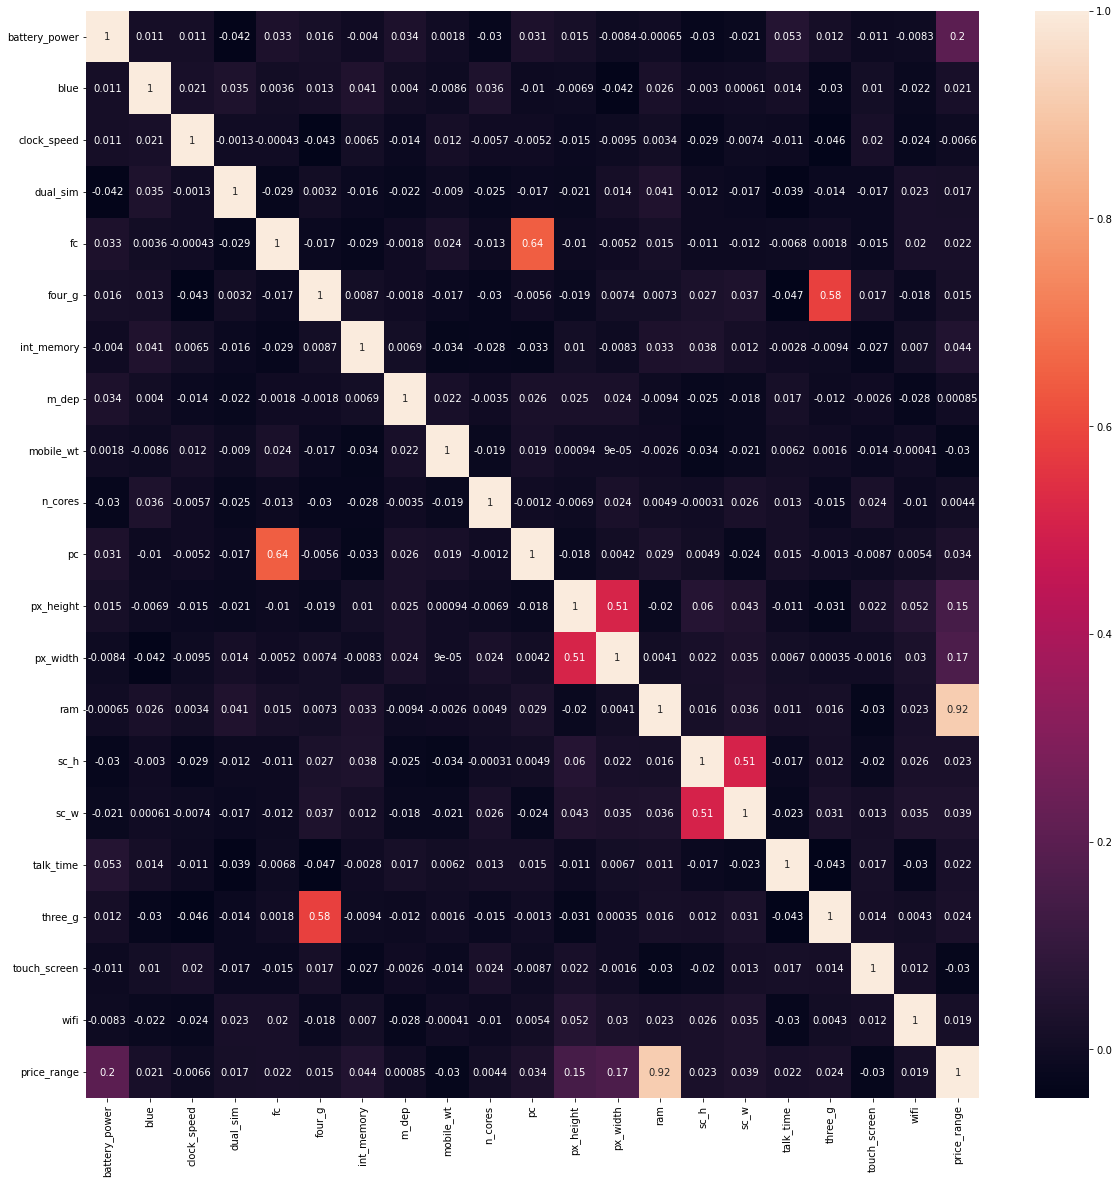

In [72]:
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [73]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

<AxesSubplot:>

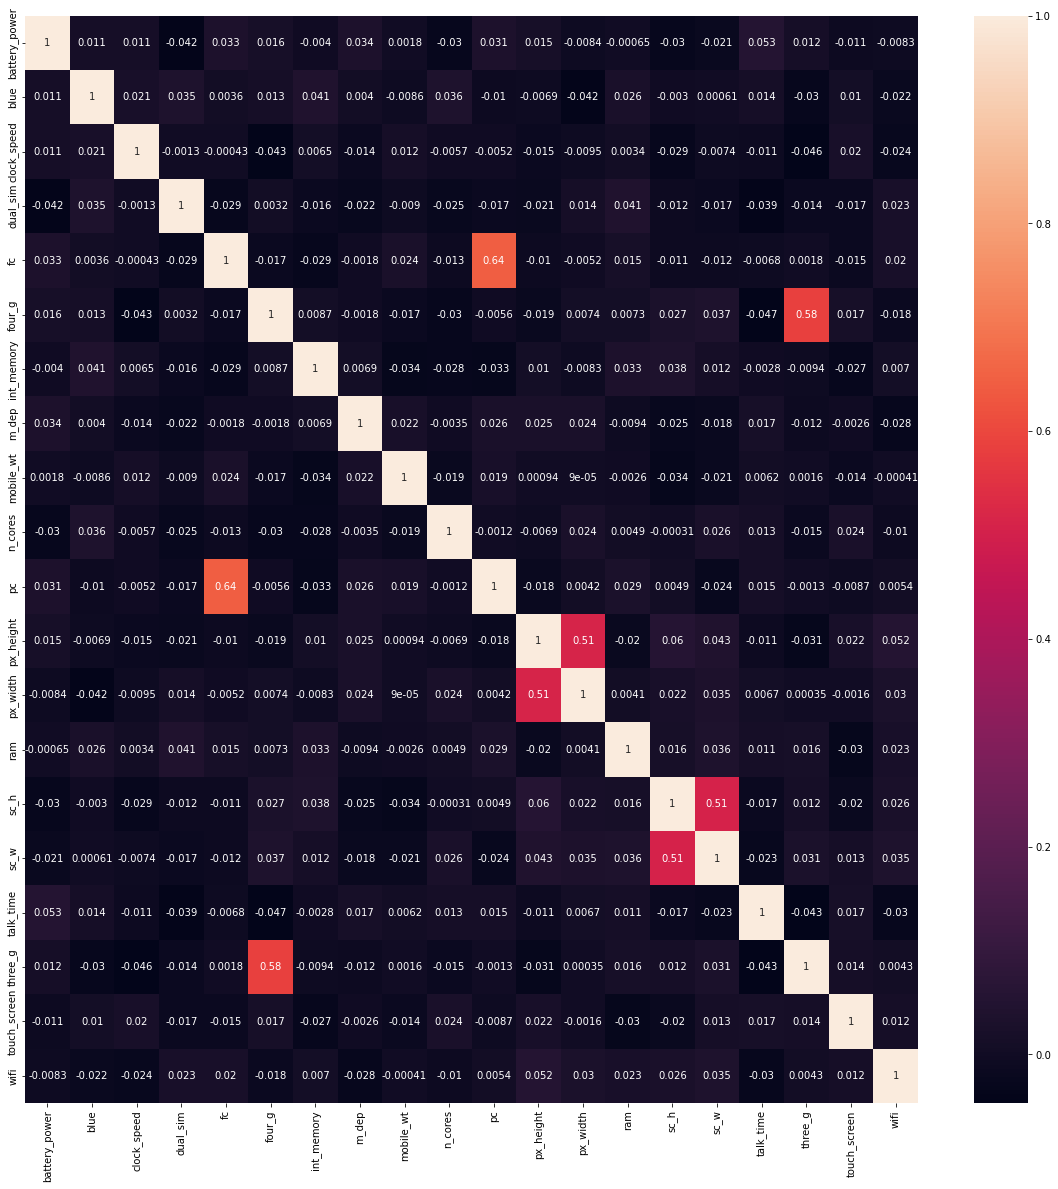

In [77]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [78]:
# taking a threshold value --> given by domain expert


In [79]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [81]:
# giving threshold 60 percent for the time 
threshold=0.60

In [82]:
correlation(df.iloc[:,:-1],threshold)

{'pc'}

In [83]:
# so this feature we can drop it or we can use it

# information gain

In [84]:
from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import mutual_info_regression # for regression problem


Mutual information (MI) [1]_ between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency

In [86]:
mutual_info=mutual_info_classif(x,y)

mutual_data=pd.Series(mutual_info,index=x.columns)

In [89]:
mutual_data.sort_values(ascending=False)

ram              0.845983
px_height        0.030747
mobile_wt        0.029536
touch_screen     0.029158
battery_power    0.028793
three_g          0.028140
px_width         0.027255
clock_speed      0.014303
fc               0.011483
talk_time        0.007862
sc_w             0.003853
dual_sim         0.000821
sc_h             0.000000
pc               0.000000
blue             0.000000
n_cores          0.000000
m_dep            0.000000
int_memory       0.000000
four_g           0.000000
wifi             0.000000
dtype: float64

In [ ]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

#  Drop Constant Features Using Variance Threshold

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [104]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [107]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [108]:
### Finding non constant features
sum(var_thres.get_support())

20

In [110]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [111]:
for column in constant_columns:
    print(column)

In [112]:
x.drop(constant_columns,axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1
